Name: Dieu Vu

Student ID: 2012229

# Assignment: Phishing web sites

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from IPython.display import IFrame
from IPython.display import Markdown as md

In [2]:
df = pd.read_csv('phishing.csv', sep=';')
# drop rows with missing values
df.dropna(axis=0, how='any', inplace=True)
df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
5,-1,0,-1,1,-1,-1,1,1,-1,1,...,1,1,1,1,1,-1,1,-1,-1,1
6,1,0,-1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,-1,1,0,-1,-1
7,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,0,-1,1,0,1,-1
8,1,0,-1,1,1,-1,1,1,-1,1,...,1,1,1,-1,1,1,1,0,1,1
9,1,1,-1,1,1,-1,-1,1,-1,1,...,1,1,1,-1,0,-1,1,0,1,-1


In [3]:
# As 1 is a legitimate site, we replace -1 by 0 to create binary Result
df['Result'] = df['Result'].replace(-1, 0)

In [4]:
# length of dataframe
df.shape[0]

11055

In [5]:
# inspect values in different columns
for col in df.columns.values:
    print(f"{col} unique values: {df[col].unique()}")

having_IP_Address unique values: [-1  1]
URL_Length unique values: [ 1  0 -1]
Shortining_Service unique values: [ 1 -1]
having_At_Symbol unique values: [ 1 -1]
double_slash_redirecting unique values: [-1  1]
Prefix_Suffix unique values: [-1  1]
having_Sub_Domain unique values: [-1  0  1]
SSLfinal_State unique values: [-1  1  0]
Domain_registeration_length unique values: [-1  1]
Favicon unique values: [ 1 -1]
port unique values: [ 1 -1]
HTTPS_token unique values: [-1  1]
Request_URL unique values: [ 1 -1]
URL_of_Anchor unique values: [-1  0  1]
Links_in_tags unique values: [ 1 -1  0]
SFH unique values: [-1  1  0]
Submitting_to_email unique values: [-1  1]
Abnormal_URL unique values: [-1  1]
Redirect unique values: [0 1]
on_mouseover unique values: [ 1 -1]
RightClick unique values: [ 1 -1]
popUpWindow unique values: [ 1 -1]
Iframe unique values: [ 1 -1]
age_of_domain unique values: [-1  1]
DNSRecord unique values: [-1  1]
web_traffic unique values: [-1  0  1]
Page_Rank unique values: [-1

As the features described in the documentation are binary (yes/no) rather than categorical, and that we know -1 denoting a "legitimate" value to the feature, we can replace "-1" and "0" by "0" - which is "not phishing" value

In [6]:
df = df.replace(-1,0)
df.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,0,1,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,0,0
1,1,1,1,1,1,0,0,1,0,1,...,1,1,0,0,0,0,1,1,1,0
2,1,0,1,1,1,0,0,0,0,1,...,1,1,1,0,1,0,1,0,0,0
3,1,0,1,1,1,0,0,0,1,1,...,1,1,0,0,1,0,1,0,1,0
4,1,0,0,1,1,0,1,1,0,1,...,0,1,0,0,0,0,1,1,1,1
5,0,0,0,1,0,0,1,1,0,1,...,1,1,1,1,1,0,1,0,0,1
6,1,0,0,1,1,0,0,0,1,1,...,1,1,1,0,0,0,1,0,0,0
7,1,0,1,1,1,0,0,0,1,1,...,1,1,0,0,0,0,1,0,1,0
8,1,0,0,1,1,0,1,1,0,1,...,1,1,1,0,1,1,1,0,1,1
9,1,1,0,1,1,0,0,1,0,1,...,1,1,1,0,0,0,1,0,1,0


In [7]:
colnames = df.columns

In [8]:
X = df.drop(['Result'], axis=1)
X.head(10)

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWindow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,0,1,1,1,0,0,0,0,0,1,...,1,1,1,0,0,0,0,1,1,0
1,1,1,1,1,1,0,0,1,0,1,...,1,1,1,0,0,0,0,1,1,1
2,1,0,1,1,1,0,0,0,0,1,...,1,1,1,1,0,1,0,1,0,0
3,1,0,1,1,1,0,0,0,1,1,...,1,1,1,0,0,1,0,1,0,1
4,1,0,0,1,1,0,1,1,0,1,...,1,0,1,0,0,0,0,1,1,1
5,0,0,0,1,0,0,1,1,0,1,...,1,1,1,1,1,1,0,1,0,0
6,1,0,0,1,1,0,0,0,1,1,...,1,1,1,1,0,0,0,1,0,0
7,1,0,1,1,1,0,0,0,1,1,...,1,1,1,0,0,0,0,1,0,1
8,1,0,0,1,1,0,1,1,0,1,...,1,1,1,1,0,1,1,1,0,1
9,1,1,0,1,1,0,0,1,0,1,...,1,1,1,1,0,0,0,1,0,1


In [9]:
Y = df['Result']

## Decision tree classification

There are many parameters that can be used for the classifier builder, such as max_depth or max_features. However, as we have a large sample size and also 30 features, we can use the min_impurity_decrease to set the threshhold for the minimum value at which the impurity decreases at each split (calculation following the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)).

The split will stop if the impurity decrease is less than the minimum value set in the parameter.

In [10]:
# decision tree classification
classifier = tree.DecisionTreeClassifier(min_impurity_decrease=0.0025)
classifier.fit(X,Y)

DecisionTreeClassifier(min_impurity_decrease=0.0025)

In [11]:
classifier.get_depth()

4

The tree then have the depth of 4 as visualized followingly

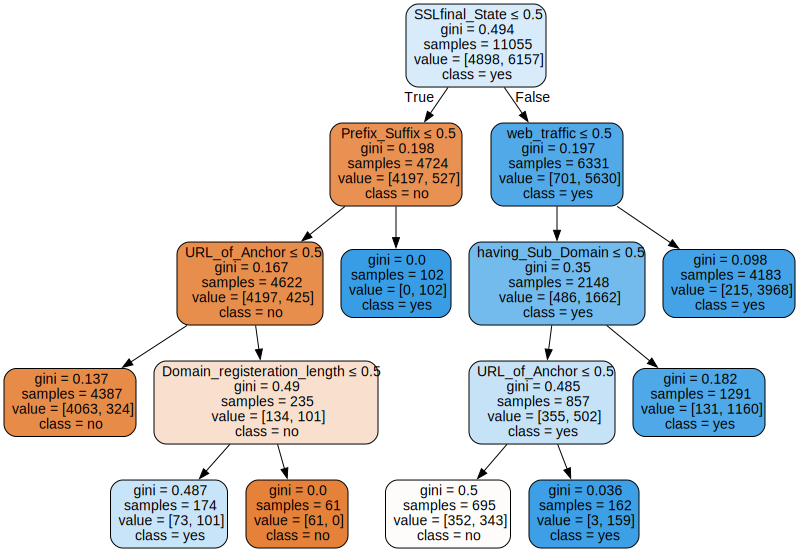

In [12]:
# visualize
dot_data = tree.export_graphviz(classifier, out_file=None,
feature_names=colnames[:30],
class_names=['no','yes'],
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data)

graph


In [13]:
# predict
Y_pred = classifier.predict(X)
# output confusion matrix
cm = confusion_matrix(Y, Y_pred)
print("Confusion matrix:\n",cm)
accuracy = accuracy_score(Y, Y_pred)
print("Accuracy calculated from the training set = %.3f (SUBJECT TO OVERFITTING)" % (accuracy))
print(classification_report(Y, Y_pred, target_names=['no', 'yes']))
report = classification_report(Y, Y_pred, target_names=['no', 'yes'], output_dict=True)

Confusion matrix:
 [[4476  422]
 [ 667 5490]]
Accuracy calculated from the training set = 0.901 (SUBJECT TO OVERFITTING)
              precision    recall  f1-score   support

          no       0.87      0.91      0.89      4898
         yes       0.93      0.89      0.91      6157

    accuracy                           0.90     11055
   macro avg       0.90      0.90      0.90     11055
weighted avg       0.90      0.90      0.90     11055



In [14]:
md("""
- There were {} cases where phishing was predicted but the site is legitimate.
- The tree classifies correctly {}% of the observations.
- For phishing site, the phishing site could be predicted with a probability of {}%.
- For the legitimate, the legitimate sites could be predicted with a probability of {}%.
- When the decision tree predicts phishing, the probability of phishing is {}%.
- When the decision tree predicts legitimate, the probability of legitimate is {}%.
"""
.format(cm[0,1],
        "%.1f" % (accuracy*100),
        "%.0f" % (report['yes']['recall']*100),
        "%.0f" % (report['no']['recall']*100),
        "%.0f" % (report['yes']['precision']*100),
        "%.0f" % (report['no']['precision']*100)
       ))



- There were 422 cases where phishing was predicted but the site is legitimate.
- The tree classifies correctly 90.1% of the observations.
- For phishing site, the phishing site could be predicted with a probability of 89%.
- For the legitimate, the legitimate sites could be predicted with a probability of 91%.
- When the decision tree predicts phishing, the probability of phishing is 93%.
- When the decision tree predicts legitimate, the probability of legitimate is 87%.


#### There could be overfitting issue in the training model, so we use cross-validation to validate the result

In [15]:
# cross-validate
# number of folds
k = 10
scores = cross_val_score(estimator=classifier,
X=X,
y=Y,
scoring="accuracy",
cv=k)
print("Accuracies from %d individual folds:" % k)
print(scores)
print("Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

Accuracies from 10 individual folds:
[0.90325497 0.90596745 0.89330922 0.90506329 0.89692586 0.92669683
 0.91402715 0.85520362 0.89773756 0.89502262]
Accuracy calculated using 10-fold cross validation = 0.899


In [16]:
6157/11055

0.5569425599276345

The overall accuracy is higher than frequency of the most common class which is 6157/11055 = 0.55. Using the decision tree helps the prediction to be more accurate to some extents.

<a id='decision-tree-result'><a/>


#### From the result above: An internet analyst can follow the following steps to make the decision of whether the website is likely to be a phishing site or not:
- Check Whether the website uses HTTPS. 
    - If not, then check the web traffic if the website ranked among the top 100,000 of popularity. 
        - If the website has no traffic or is not recognized by the Alexa database, it's likely to be a phishing website
            - Check if the URL of the anchor is linked to the same domain. If it links to a different domain, it's likely that the website is phishing
    - If yes, check if the URL has prefixes or subfixes added (with the dash symbol)
        - If the website has prefixes or subfixes added (with the dash symbol), it's a phishing website
        - If the website does NOT prefixes or subfixes
            - Check if the domain name has been registered in a short period of time (< 1 year). If yes, it's likely that the website is phishing

## Using random forest

In [17]:
randomforest_clf = ensemble.RandomForestClassifier(min_impurity_decrease=0.0025)
randomforest_clf.fit(X,Y)

RandomForestClassifier(min_impurity_decrease=0.0025)

In [18]:
rf_Y_pred = randomforest_clf.predict(X)
# output confusion matrix
rf_cm = confusion_matrix(Y, rf_Y_pred)
print("Confusion matrix:\n",rf_cm)
rf_accuracy = accuracy_score(Y, rf_Y_pred)
print("Accuracy calculated from the training set = %.3f (SUBJECT TO OVERFITTING)" % (accuracy))
rf_report = classification_report(Y, rf_Y_pred, target_names=['no', 'yes'], output_dict=True)
print(classification_report(Y, rf_Y_pred, target_names=['no', 'yes']))

Confusion matrix:
 [[4300  598]
 [ 410 5747]]
Accuracy calculated from the training set = 0.901 (SUBJECT TO OVERFITTING)
              precision    recall  f1-score   support

          no       0.91      0.88      0.90      4898
         yes       0.91      0.93      0.92      6157

    accuracy                           0.91     11055
   macro avg       0.91      0.91      0.91     11055
weighted avg       0.91      0.91      0.91     11055



In [19]:
md("""
- There were {} cases where phishing was predicted but the site is legitimate.
- The tree classifies correctly {}% of the observations.
- For phishing site, the phishing site could be predicted with a probability of {}%.
- For the legitimate, the legitimate sites could be predicted with a probability of {}%.
- When the decision tree predicts phishing, the probability of phishing is {}%.
- When the decision tree predicts legitimate, the probability of legitimate is {}%.
"""
.format(rf_cm[0,1],
        "%.1f" % (rf_accuracy*100),
        "%.0f" % (rf_report['yes']['recall']*100),
        "%.0f" % (rf_report['no']['recall']*100),
        "%.0f" % (rf_report['yes']['precision']*100),
        "%.0f" % (rf_report['no']['precision']*100)
       ))



- There were 598 cases where phishing was predicted but the site is legitimate.
- The tree classifies correctly 90.9% of the observations.
- For phishing site, the phishing site could be predicted with a probability of 93%.
- For the legitimate, the legitimate sites could be predicted with a probability of 88%.
- When the decision tree predicts phishing, the probability of phishing is 91%.
- When the decision tree predicts legitimate, the probability of legitimate is 91%.


There could be overfitting issue in the training model, so we use cross-validation to validate the result

In [20]:
# cross-validate
# number of folds
k = 10
scores = cross_val_score(estimator=randomforest_clf,
X=X,
y=Y,
scoring="accuracy",
cv=k)
print("Accuracies from %d individual folds:" % k)
print(scores)
print("Accuracy calculated using %d-fold cross validation = %.3f" % (k, scores.mean()))

Accuracies from 10 individual folds:
[0.89873418 0.89873418 0.89059675 0.90415913 0.9005425  0.92217195
 0.90497738 0.8678733  0.9158371  0.91493213]
Accuracy calculated using 10-fold cross validation = 0.902


The number of features seen during fit

In [21]:
len(randomforest_clf.feature_names_in_)

30

The accuracy score improves when we use random forest algorithm when we compare with single decision tree.

random pick decision tree 36
depth of tree: 5


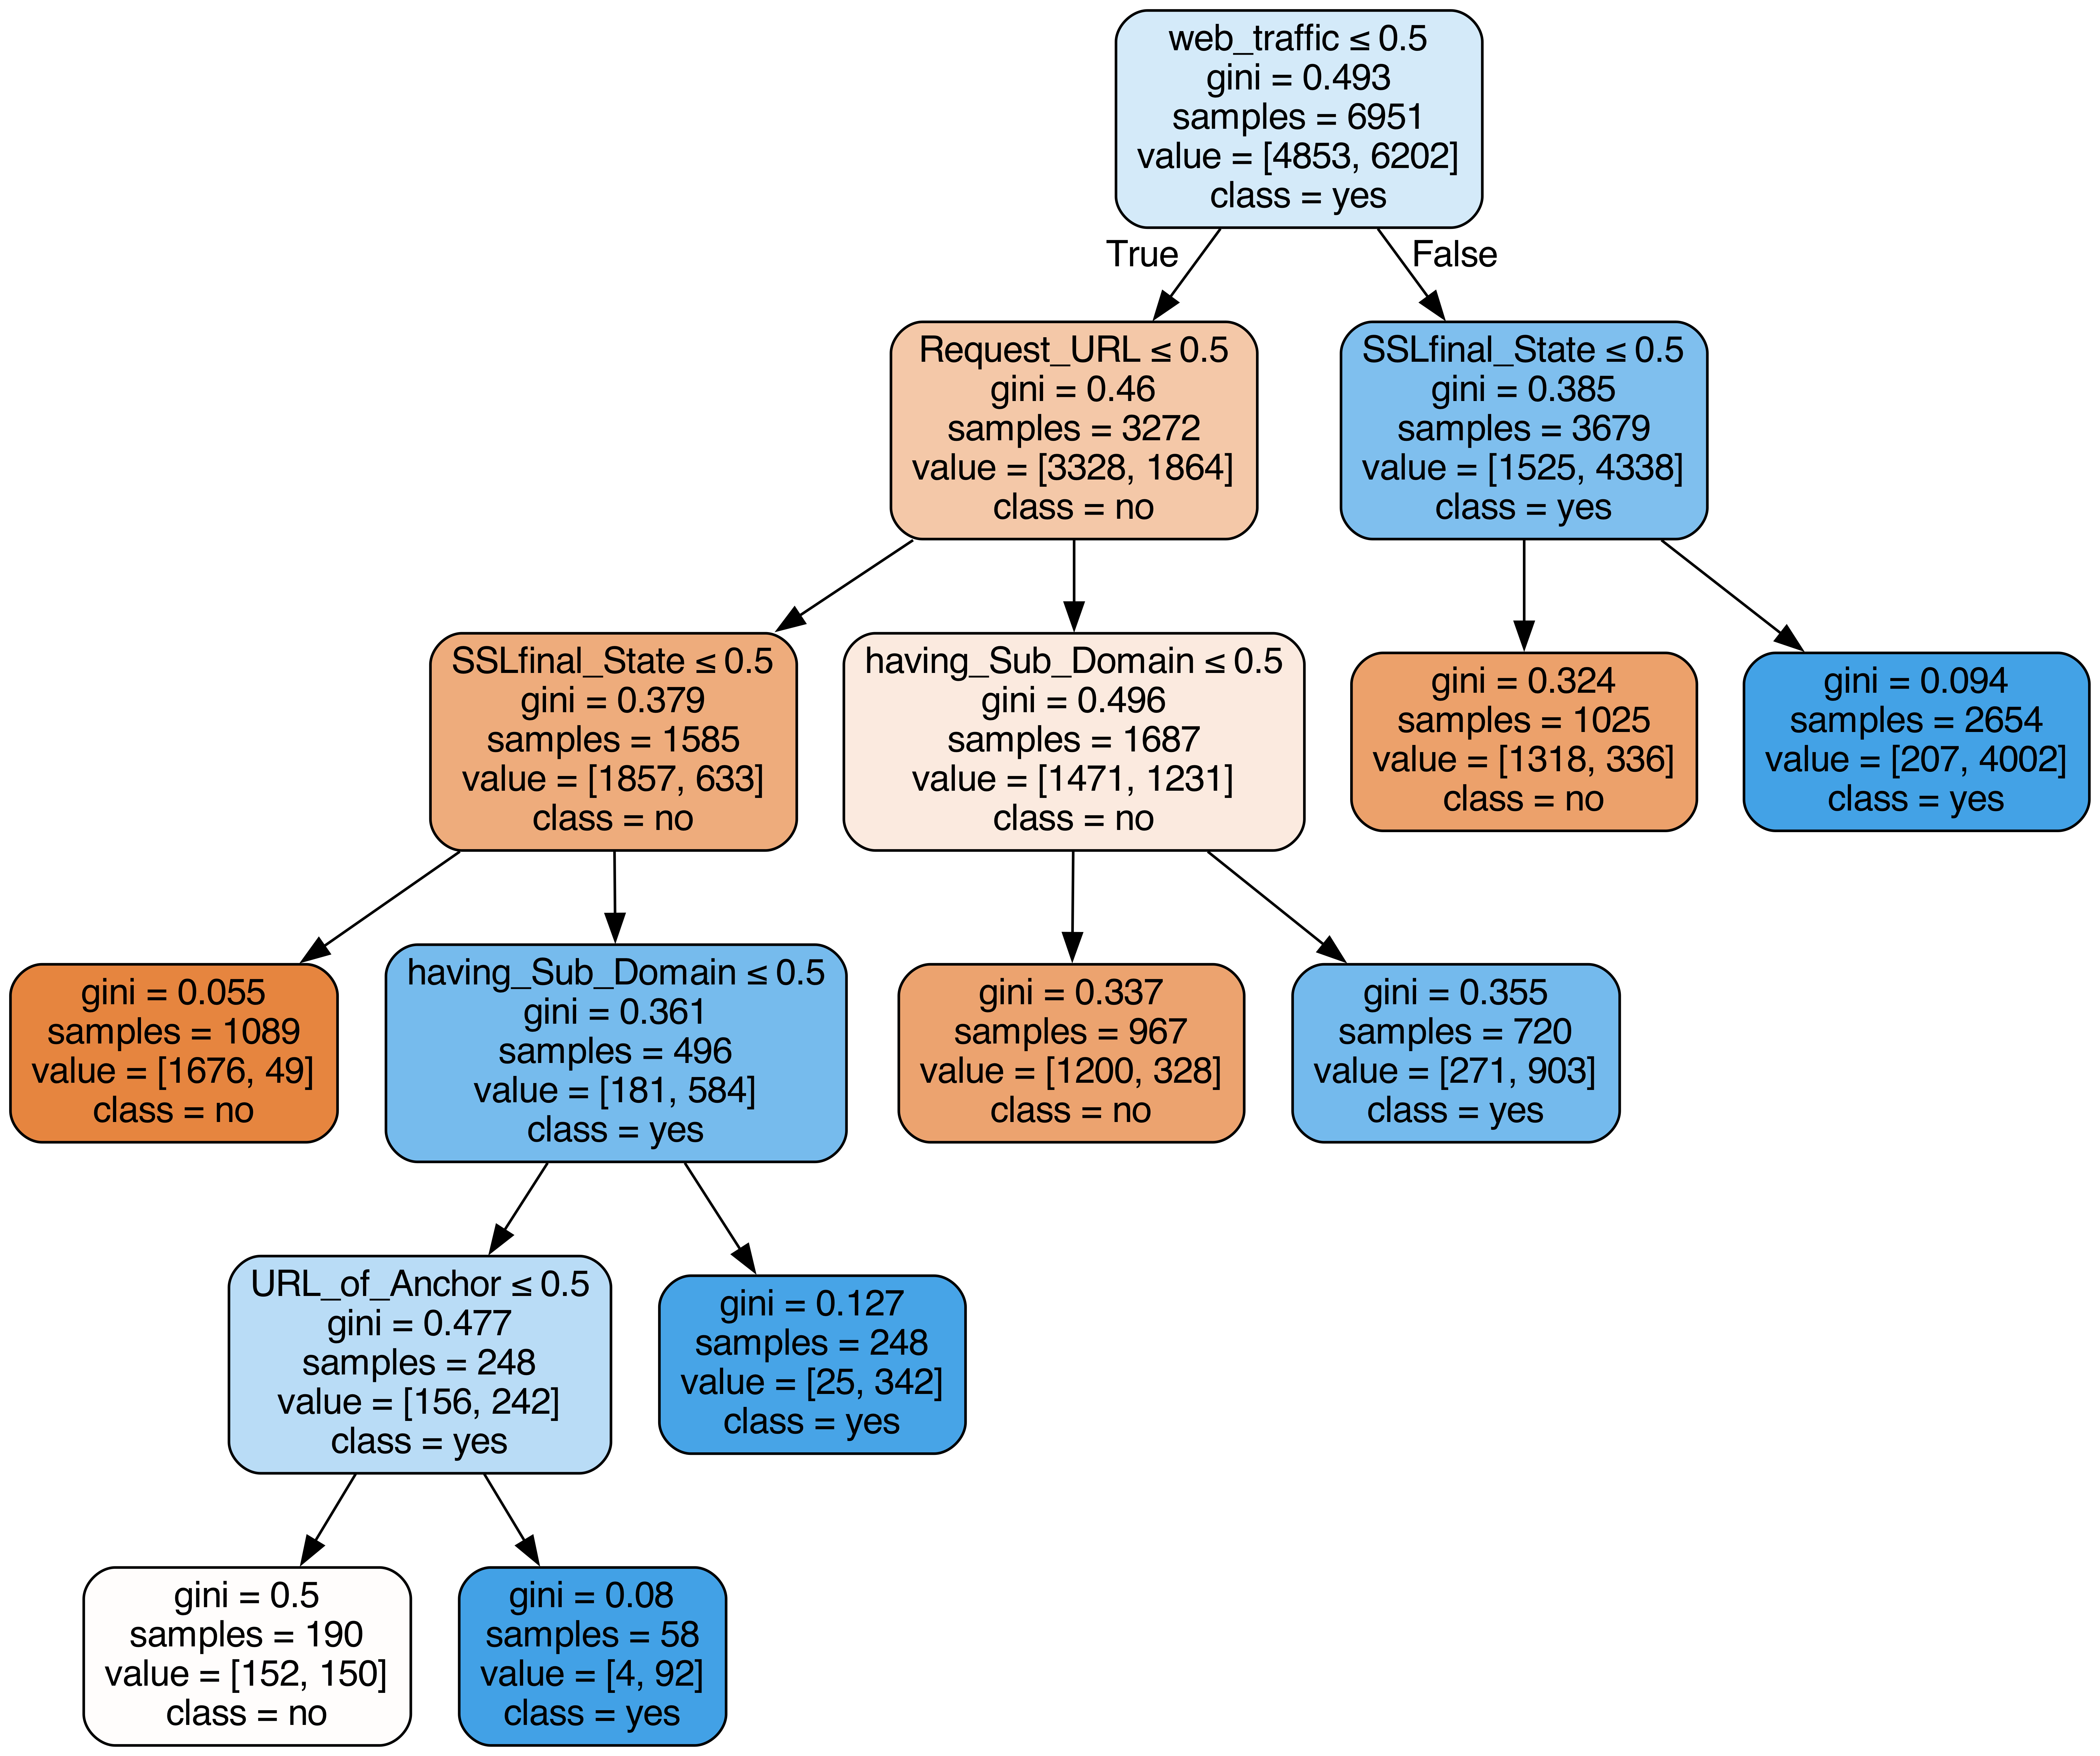

In [24]:
# visualize a decision tree in random forest
# Extract single tree
import random

rand_tree = random.randint(1,100)
print(f"random pick decision tree {rand_tree}")
estimator = randomforest_clf.estimators_[rand_tree]
print(f"depth of tree: {estimator.get_depth()}")
export_graphviz(estimator, out_file=f'tree_{rand_tree}.dot',
feature_names=colnames[:30],
class_names=['no','yes'],
filled=True, rounded=True,
special_characters=True)
from subprocess import call
call(['dot', '-Tpng', f'tree_{rand_tree}.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png', height = 50)


#### Feature importance based on mean decrease in impurity

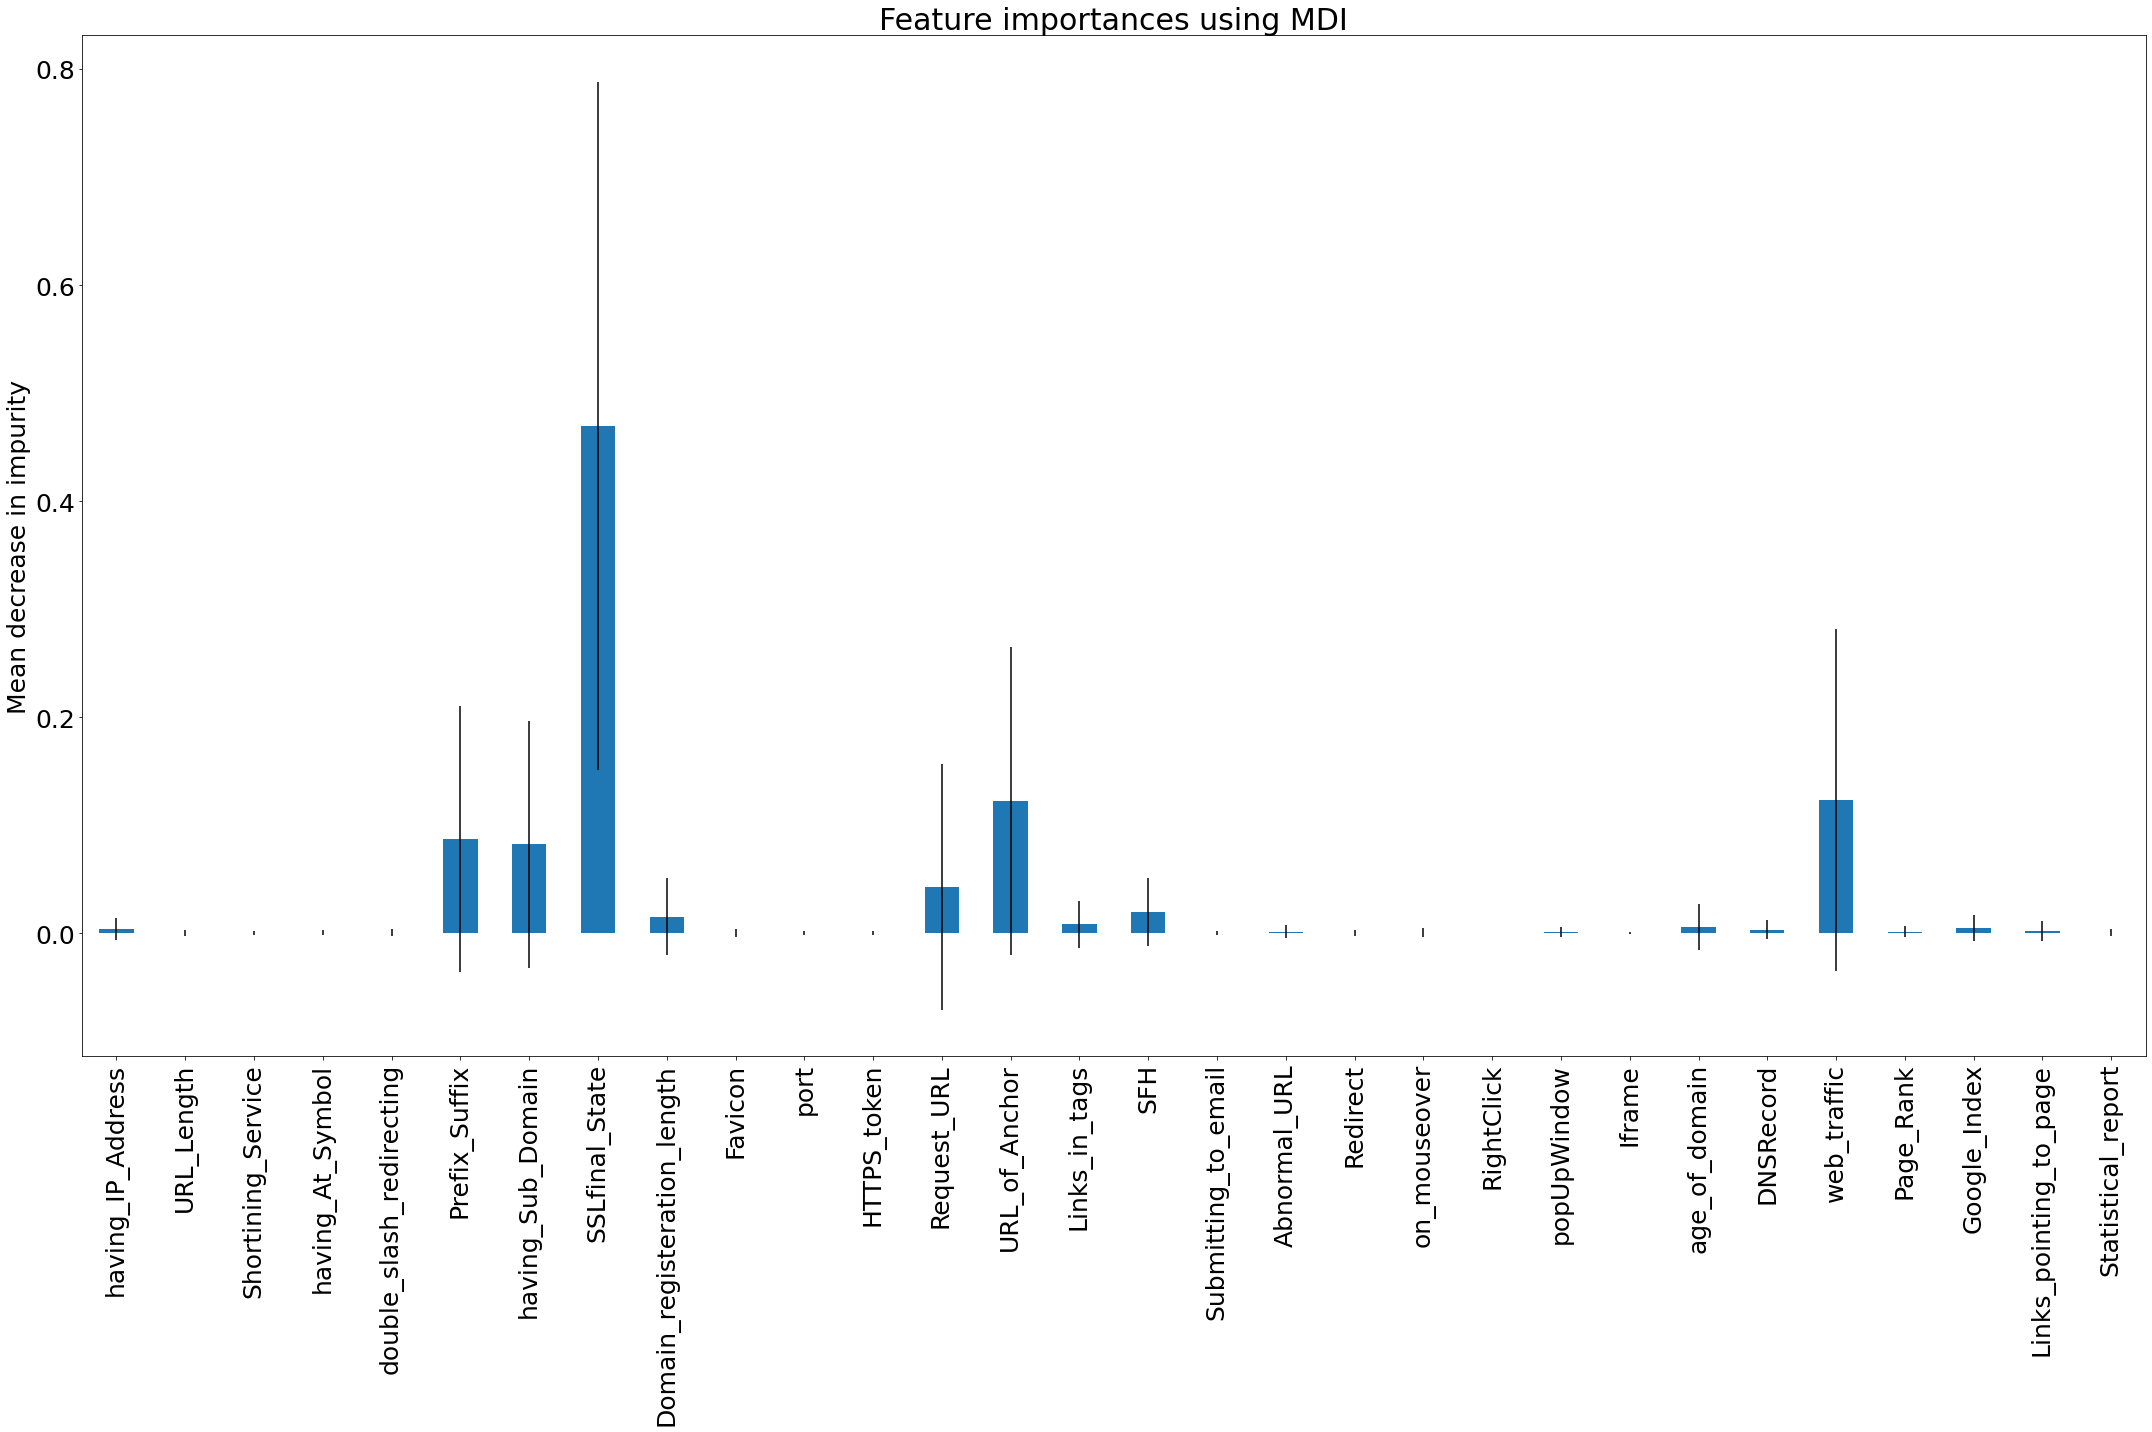

In [25]:
importances = randomforest_clf.feature_importances_
feature_names = [f"{i}" for i in X.columns.values]
forest_importances = pd.Series(importances, index=feature_names)
std = np.std([tree.feature_importances_ for tree in randomforest_clf.estimators_], axis=0)
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(30,20))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI",  fontsize=30)
ax.set_ylabel("Mean decrease in impurity", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
fig.tight_layout()

From the feature importance results, we can confirm that the feature `SSLfinal_State` has the highest importance when classifying the phishing website. Other features by importance level order are `web_traffic`, `URL_of_Anchor`, `having_Sub_Domain` and `Prefix_Suffix`. This result also agrees with the result we get from the [single decision tree result above](#decision-tree-result).